In [1]:
#import thư viện

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
#đọc dữ liệu

path = 'price_stock.csv'
dataframe = pd.read_csv(path)

In [17]:
#chuyển vị ma trận để xử lý

df_transposed = dataframe.T

In [4]:
#import TimeSeriesScalerMeanVariance để Normalize data

from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [66]:
#Scaler data

X = TimeSeriesScalerMeanVariance().fit_transform(df_transposed.iloc[1:]) #dùng fit_transform() để fit dữ liệu sau đó chuyển đổi nó.

X.shape #in hình dạng của X

(60, 244, 1)

In [21]:
#định dạng lại dạng của X dể cluster

X = X.reshape(X.shape[0],X.shape[1]) #chuyển X về 2 chiều

In [7]:
#import thư viện TimeSeriesKMeans của tslearn

from tslearn.clustering import TimeSeriesKMeans

# Elbow method

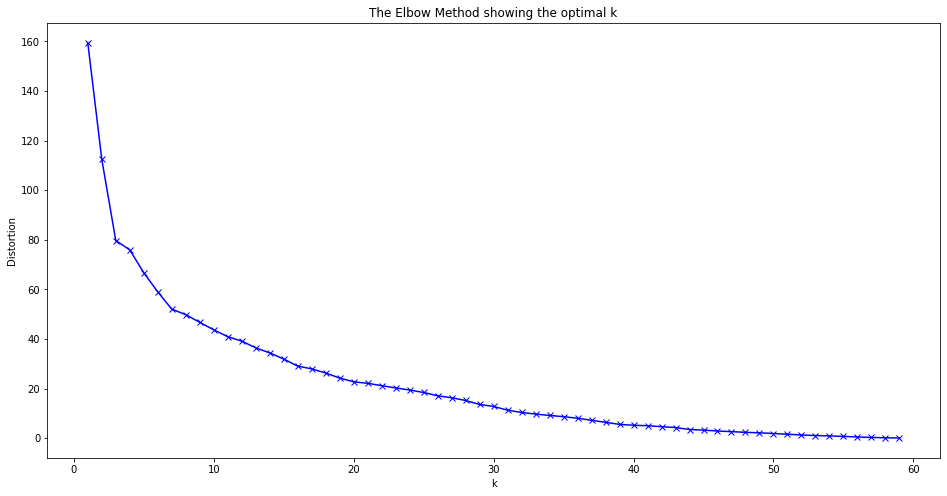

In [72]:
#elbow method for Standard Euclidean k-means
K = range(1, 60)

distortions_km = [] #Tạo hàm lưu độ biến dạng của từng cái k clusters
 
for k in K:
    
    #dùng TimeSeriesKMeans() để K-means clustering cho data
    km = TimeSeriesKMeans(n_clusters=k, metric="euclidean", max_iter=5, random_state=1) #với metric là euclidean
    km.fit(X) #dùng fit() dể clustering k-mean
    distortions_km.append(km.inertia_) 

plt.figure(figsize=(16,8))
plt.plot(K, distortions_km, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

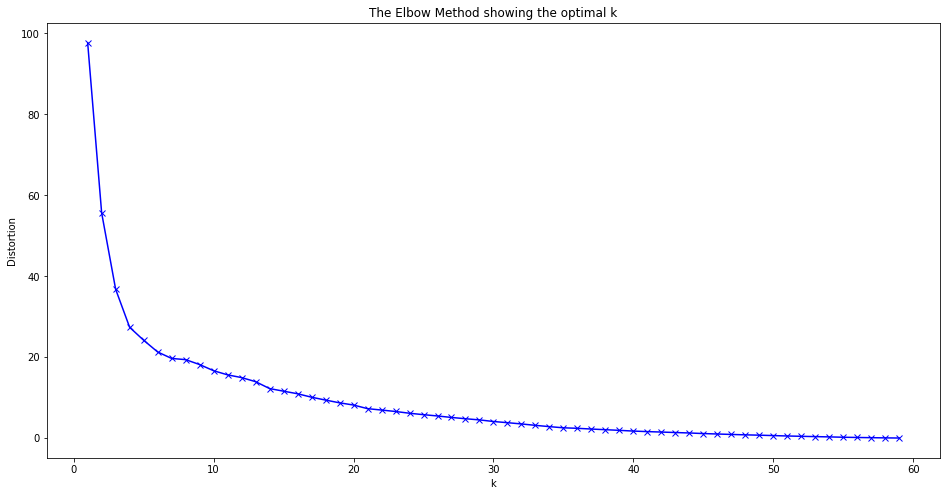

In [76]:
#elbow method for DBA k-means

distortions_km_dba = [] #Tạo hàm lưu độ biến dạng của từng cái k clusters
 
for k in K:
    
    #dùng TimeSeriesKMeans() để K-means clustering cho data
    km_dba = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=1, max_iter_barycenter=1, random_state=1)
    km_dba.fit(X) #dùng fit() dể clustering k-mean
    distortions_km_dba.append(km_dba.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions_km_dba, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

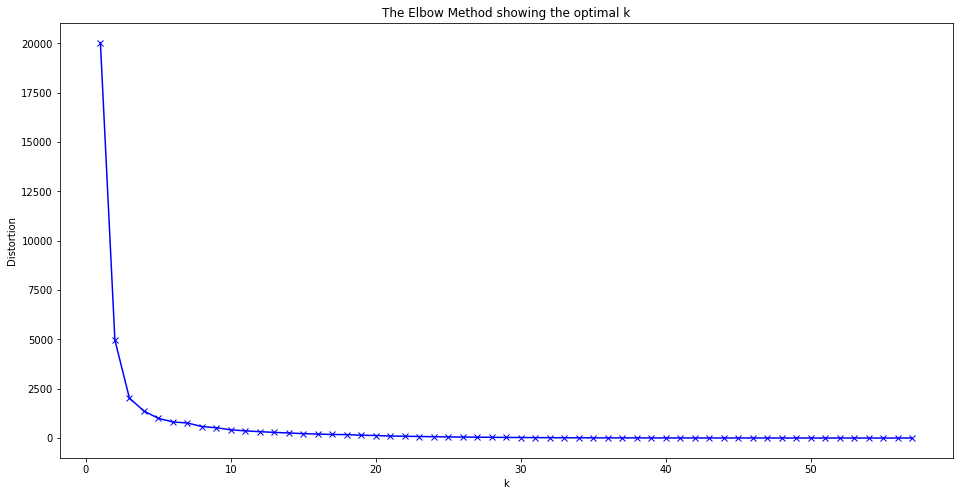

In [85]:
#elbow method for Soft-DTW k-means

distortions_km_sdtw = []#Tạo hàm lưu độ biến dạng của từng cái k clusters

for k in K:
    #dùng TimeSeriesKMeans() để K-means clustering cho data
    km_sdtw = TimeSeriesKMeans(n_clusters=k, metric="softdtw", max_iter=1,max_iter_barycenter=1,metric_params={"gamma": .01},random_state=1)
    km_sdtw.fit(X) #dùng fit() dể clustering k-mean
    distortions_km_sdtw.append(km_sdtw.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions_km_sdtw, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Clustering

In [99]:
#Standard Euclidean k-means

#clustering 
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=5,random_state=1) #theo hình chọn K = 7
km.fit(X)

#tạo tập dự đoán y_pred_km từ X bằng fit_predict()
y_pred_km= km.fit_predict(X)

In [100]:
#DBA k-means

#clustering 

km_dba = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=1, max_iter_barycenter=1, random_state=0) #chọn k = 7
km_dba.fit(X) #dùng fit() dể clustering k-mean

#tạo tập dự đoán y_pred_km_dba từ X bằng fit_predict()
y_pred_km_dba = km_dba.fit_predict(X)

In [101]:
#Soft-DTW k-means

#clustering 

km_sdtw = TimeSeriesKMeans(n_clusters=7, metric="softdtw", max_iter=1,max_iter_barycenter=1,metric_params={"gamma": .01},random_state=0) 
km_sdtw.fit(X) #dùng fit() dể clustering k-mean

#tạo tập dự đoán y_pred từ X bằng fit_predict()
y_pred_km_sdtw = km_sdtw.fit_predict(X)


# Visualization of results

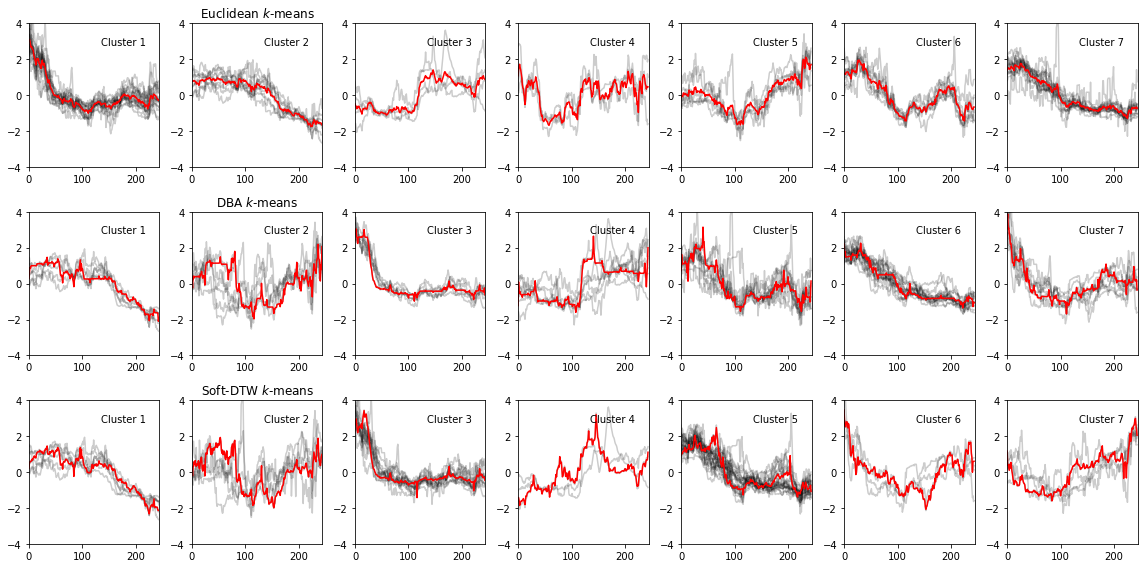

In [102]:
#Standard Euclidean k-means

plt.figure(figsize=(16,8))
for yi in range(7):
    plt.subplot(3, 7, yi + 1)
    for xx in X[y_pred_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2) # vẽ các đường data
    plt.plot(km.cluster_centers_[yi].ravel(), "r-") # vẽ centroid
    plt.xlim(0, X.shape[1])
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

        
#DBA k-means

#Vẽ hình
# plt.figure(figsize=(16,8))
for yi in range(7):
    plt.subplot(3, 7, yi + 8)
    for xx in X[y_pred_km_dba == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2) # vẽ các đường data
    plt.plot(km_dba.cluster_centers_[yi].ravel(), "r-") # vẽ đường centroid
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
        

#Soft-DTW k-means

#Vẽ hình
# plt.figure(figsize=(16,8))
for yi in range(7):
    plt.subplot(3, 7, yi + 15)
    for xx in X[y_pred_km_sdtw == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2) #vẽ data
    plt.plot(km_sdtw.cluster_centers_[yi].ravel(), "r-") #vẽ centroid
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")
        
plt.tight_layout()
plt.show()